# Question 2: Classifcation - Convolutional Neural Networks (CNNs)

## Overview:

In this question we will be using CNNs to do the classification on Fashion-Mnist. We tried multiple CNN architectures including, VGG, inception, and Resnet. It is worth noting that first, we split our data into training, validation, and testing data sets to help us develop the best model. After finding the suitable hyper-parameteres, we combined the three sets, and we used the full training file (60,000 training samples) to train our model, to imporive the generalizability of our model.

## 2.1: Design and Implementation Choices of your Model

### Importing the required libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#from tensorflow.keras import models
from tensorflow.keras.models import Sequential, Model

#from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Dropout, Flatten, BatchNormalization, Input, Activation, Conv2D, MaxPooling2D 
from tensorflow.keras.layers import concatenate, AveragePooling2D, add

from tensorflow.keras.utils import to_categorical

from tensorflow.keras.optimizers import SGD, RMSprop, Adam

from tensorflow.keras.regularizers import l2,l1

from tensorflow.keras.initializers import Orthogonal, glorot_uniform


### Reading and exploring the training data

In [ ]:
fashion_mnist = pd.read_csv('train.csv')

In [ ]:
fashion_mnist.head()

,Id,Label,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784
0,10000,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,10001,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,10002,0,0,0,0,0,0,0,0,0,1,0,0,44,48,147,59,0,78,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,189,113,111,113,27,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,98,33,70,72,74,46,68,37,40,31,9,0,0,0,0,0,0,0,0
3,10003,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,10004,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
x = fashion_mnist[fashion_mnist.columns[2:786]].values
y = np.array(fashion_mnist['Label'])

In [ ]:
x.shape

(60000, 784)

In [ ]:
y.shape

(60000,)

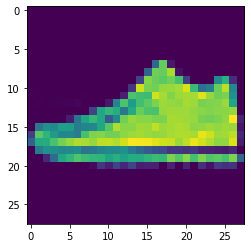

In [ ]:
plt.imshow(x[5].reshape(28,28))

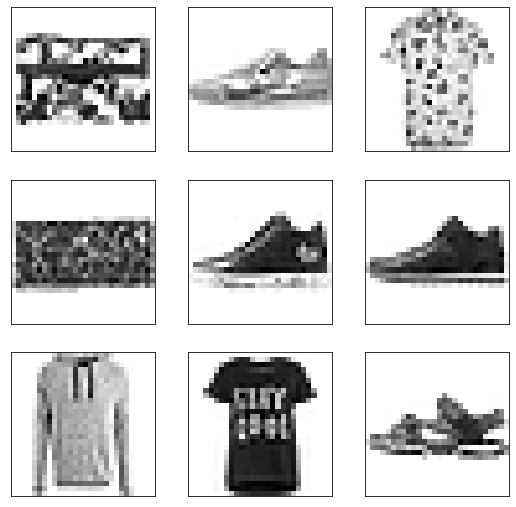

In [ ]:
plt.figure(figsize=(9,9))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x[i].reshape(28,28), cmap=plt.cm.binary)
plt.show()

In [ ]:
#Finding the number of classes
set(y)

{0, 1, 2, 3, 4}

#### Discussion

The data set contains the pixel values of a 28X28 images of clothes. The data set contains 5 classes, which are {0, 1, 2, 3, 4}.

### Splitting the training data into three sets: train (60%), validation (20%), and testing (20%)

In [ ]:
# First split the data into training (80%) and testing (20%)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 42)
#Now split the training dataset into training (75%) and validation (25%)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state = 42)

In [ ]:
x_train.shape

(36000, 784)

In [ ]:
x_val.shape

(12000, 784)

In [ ]:
x_test.shape

(12000, 784)

### Preprocessing the input data

We tried to different preprocessing techiniques, which are standardization and scaling the pixel values ny dividing the value of each pixel by 255. It was found that scaling the pixel values gave slightly higher accurecy

In [ ]:
# Transform to float32 and normalize
x_train = x_train.astype('float32') / 255.0  
x_val = x_val.astype('float32') / 255.0 
x_test = x_test.astype('float32') / 255.0 

In [ ]:
# Reshaping the tensor containing the pixel values, such that it will be suitable to be used with CNN layers
x_train = x_train.reshape((36000, 28, 28, 1))
x_val = x_val.reshape((12000, 28, 28, 1))
x_test = x_test.reshape((12000, 28, 28, 1))

In [ ]:
# Converting the labels to one-hot incoding, in order to be able to use softmax
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

In [ ]:
### Standardizing the input dada
scaler = StandardScaler()
scaler.fit(x_train)
#
x_train = scaler.transform(x_train)
x_val = scaler.transform(x_val)
x_test = scaler.transform(x_test)
#
#
x_train = x_train.reshape((36000, 28, 28, 1))
x_val = x_val.reshape((12000, 28, 28, 1))
x_test = x_test.reshape((12000, 28, 28, 1))

y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

In [ ]:
x_train = x_train.reshape((36000, 28, 28, 1))
x_val = x_val.reshape((12000, 28, 28, 1))
x_test = x_test.reshape((12000, 28, 28, 1))

x_train = x_train.astype('float64')
x_val = x_val.astype('float64')
x_test = x_test.astype('float64')

#Standarization
mean = np.mean(x_train, axis=(0,1,2,3))
std = np.std(x_train, axis=(0,1,2,3))

x_train = (x_train-mean)/(std+1e-9)
x_val = (x_val-mean)/(std+1e-9)
x_test = (x_test-mean)/(std+1e-9) 

y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

### Building the CNN models

#### My model

In [ ]:
def my_model():
    model = Sequential()
    model.add(Conv2D(32, (3,3), activation = 'relu', padding='same', input_shape=(28,28,1)))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3,3), activation = 'relu', padding='same',input_shape=(28,28,1)))
    model.add(BatchNormalization())
    model.add(Conv2D(128, (3,3), activation = 'relu', padding='same',input_shape=(28,28,1)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2,2)))
    model.add(Flatten())
    model.add(Dense(1024, activation='relu'))
    model.add(Dropout(0.7))
    model.add(BatchNormalization())
    model.add(Dense(5, activation='softmax'))
    #my_opt = SGD(learning_rate=0.001, momentum=0.9)
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [ ]:
model = my_model()

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization_4 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
batch_normalization_5 (Batch (None, 28, 28, 64)        256       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 128)       73856     
_________________________________________________________________
batch_normalization_6 (Batch (None, 28, 28, 128)       512       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 128)      

In [ ]:
model = my_model()
history = model.fit(x_train, y_train, epochs= 50 , batch_size=128, validation_data=(x_val, y_val))

Epoch 1/50
282/282 [==============================] - 6s 21ms/step - loss: 0.6482 - accuracy: 0.7364 - val_loss: 1.3851 - val_accuracy: 0.4490
Epoch 2/50
282/282 [==============================] - 6s 21ms/step - loss: 0.4990 - accuracy: 0.7964 - val_loss: 0.5878 - val_accuracy: 0.7531
Epoch 3/50
282/282 [==============================] - 6s 21ms/step - loss: 0.4404 - accuracy: 0.8203 - val_loss: 0.4257 - val_accuracy: 0.8188
Epoch 4/50
282/282 [==============================] - 6s 21ms/step - loss: 0.4217 - accuracy: 0.8281 - val_loss: 0.4588 - val_accuracy: 0.8104
Epoch 5/50
282/282 [==============================] - 6s 21ms/step - loss: 0.4142 - accuracy: 0.8336 - val_loss: 0.8836 - val_accuracy: 0.6759
Epoch 6/50
282/282 [==============================] - 6s 21ms/step - loss: 0.3997 - accuracy: 0.8391 - val_loss: 0.4437 - val_accuracy: 0.8191
Epoch 7/50
282/282 [==============================] - 6s 21ms/step - loss: 0.3709 - accuracy: 0.8499 - val_loss: 0.9047 - val_accuracy: 0.6537

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2) #report performance metrics

375/375 - 1s - loss: 0.6089 - accuracy: 0.8587


In [ ]:
print('Test Accuracy:', test_acc)


Test Accuracy: 0.8587499856948853


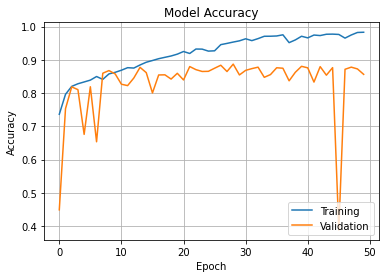

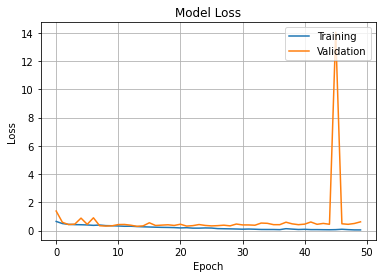

In [ ]:
#Visualize the models accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.grid()
plt.show()
#Visualize the models loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.grid()
plt.show()

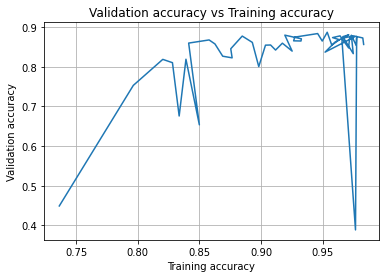

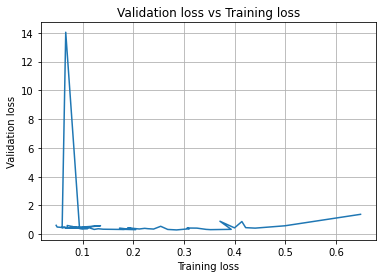

In [ ]:
#Plotting the validation accuracy vs the training accuracy
plt.plot(history.history['accuracy'], history.history['val_accuracy'])
plt.title('Validation accuracy vs Training accuracy')
plt.ylabel('Validation accuracy')
plt.xlabel('Training accuracy')
plt.grid()
plt.show()
#Plotting the validation loss vs the training loss
plt.plot(history.history['loss'], history.history['val_loss'])
plt.title('Validation loss vs Training loss')
plt.ylabel('Validation loss')
plt.xlabel('Training loss')
plt.grid()
plt.show()

#### VGG Model

In [ ]:
def VGG():
    model = Sequential()
    
    model.add(Conv2D(16, (3, 3), activation='relu', padding='same', input_shape=(28,28,1)))
    model.add(BatchNormalization())
    model.add(Conv2D(16, (3, 3), activation='relu', padding='same', input_shape=(28,28,1)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2),strides=(2,2)))

    model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2),strides=(2,2)))
    
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2),strides=(2,2)))

    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2),strides=(2,2)))


    
    model.add(Flatten())
    model.add(Dense(1024, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1024, activation='relu'))
    model.add(Dropout(0.5))
#    
    

    model.add(Dense(5, activation='softmax')) 
    # compile the keras model
    model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
    
    return model

In [ ]:
model = VGG()
history = model.fit(x_train, y_train, epochs= 50 , batch_size=128, validation_data=(x_val, y_val))

Epoch 1/50
282/282 [==============================] - 4s 12ms/step - loss: 0.6033 - accuracy: 0.7540 - val_loss: 0.9505 - val_accuracy: 0.5981
Epoch 2/50
282/282 [==============================] - 3s 11ms/step - loss: 0.4206 - accuracy: 0.8326 - val_loss: 0.4520 - val_accuracy: 0.8152
Epoch 3/50
282/282 [==============================] - 3s 11ms/step - loss: 0.3667 - accuracy: 0.8555 - val_loss: 0.3661 - val_accuracy: 0.8501
Epoch 4/50
282/282 [==============================] - 3s 11ms/step - loss: 0.3473 - accuracy: 0.8623 - val_loss: 0.3576 - val_accuracy: 0.8528
Epoch 5/50
282/282 [==============================] - 3s 11ms/step - loss: 0.3116 - accuracy: 0.8761 - val_loss: 0.3986 - val_accuracy: 0.8351
Epoch 6/50
282/282 [==============================] - 3s 11ms/step - loss: 0.3006 - accuracy: 0.8815 - val_loss: 0.3725 - val_accuracy: 0.8448
Epoch 7/50
282/282 [==============================] - 3s 11ms/step - loss: 0.2806 - accuracy: 0.8876 - val_loss: 0.3450 - val_accuracy: 0.8656

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2) #report performance metrics
print('Test Accuracy:', test_acc)

375/375 - 1s - loss: 0.5677 - accuracy: 0.8759
Test Accuracy: 0.8759166598320007


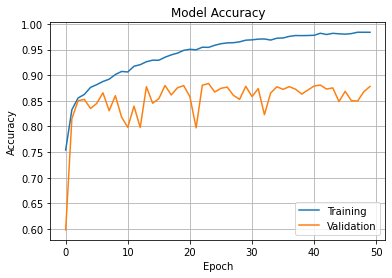

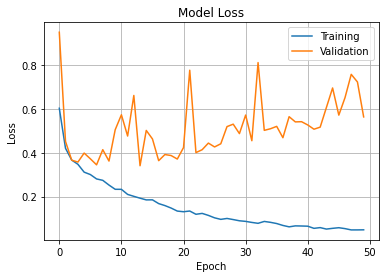

In [ ]:
#Visualize the models accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.grid()
plt.show()
#Visualize the models loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.grid()
plt.show()

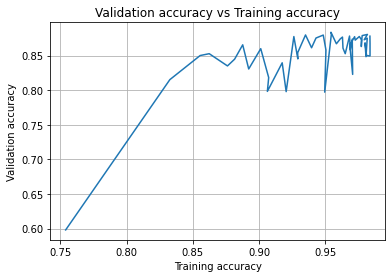

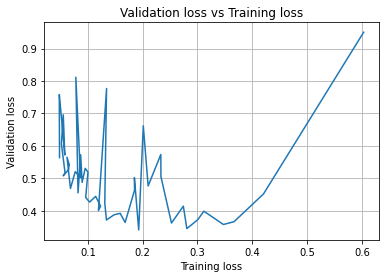

In [ ]:
#Plotting the validation accuracy vs the training accuracy
plt.plot(history.history['accuracy'], history.history['val_accuracy'])
plt.title('Validation accuracy vs Training accuracy')
plt.ylabel('Validation accuracy')
plt.xlabel('Training accuracy')
plt.grid()
plt.show()
#Plotting the validation loss vs the training loss
plt.plot(history.history['loss'], history.history['val_loss'])
plt.title('Validation loss vs Training loss')
plt.ylabel('Validation loss')
plt.xlabel('Training loss')
plt.grid()
plt.show()

#### Inception Model

In [ ]:
def inception_block(input_layer,f1,f21,f22,f31,f32,f4):
    
    branch_1 = Conv2D(f1, (1,1), padding='same', activation='relu')(input_layer)
    
    branch_2 = Conv2D(f21, (1,1), padding='same', activation='relu')(input_layer)
    branch_2 = Conv2D(f22, (3,3), padding='same', activation='relu')(branch_2)

    branch_3 = Conv2D(f31, (1,1), padding='same', activation='relu')(input_layer)
    branch_3 = Conv2D(f32, (5,5), padding='same', activation='relu')(branch_3)
    
    branch_4 = MaxPooling2D((3,3), padding='same', strides=(1,1))(input_layer)
    branch_4 = Conv2D(f4, (1,1), padding='same', activation='relu')(branch_4)  
    
    output_layer = concatenate([branch_1, branch_2, branch_3, branch_4], axis=3)
    
    return output_layer

In [ ]:
def inception_model():
    # Input 
    input_shape = Input(shape = (28,28,1))
    
    # Stage 1: convolutional layers and max pooling layers
    x = Conv2D(32, (3,3), padding='same', strides=(2, 2), activation='relu')(input_shape)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2,2), padding='same', strides=(2, 2))(x)
    x = Conv2D(32, (1,1), padding='same', strides=(1, 1), activation='relu')(input_shape)
    x = BatchNormalization()(x)
    x = Conv2D(96, (3,3), padding='same', strides=(1, 1), activation='relu')(input_shape)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2,2), padding='same', strides=(2, 2))(x)
    
    # Stage 2: Two inception blocks and average pooling
    x = inception_block(x, 64, 96, 128, 16, 32, 32)
    x = inception_block(x, 128, 128, 192, 32, 96, 64)
    x = AveragePooling2D((3, 3), padding='same', strides=2)(x)
    x = Flatten()(x)
    
    # Stage 3: Fully connected layer with 0.5 deopout and output layer
    x = Dense(1024, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(5)(x)
    output = Activation('softmax')(x)
    model = Model([input_shape],output)
    
    model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
    
    return model

In [ ]:
model = inception_model()
model.summary()

In [ ]:
model = inception_model()
history = model.fit(x_train, y_train, epochs= 25, batch_size=128, validation_data=(x_val, y_val))

Epoch 1/25
282/282 [==============================] - 19s 66ms/step - loss: 0.7642 - accuracy: 0.7243 - val_loss: 1.1114 - val_accuracy: 0.5182
Epoch 2/25
282/282 [==============================] - 18s 65ms/step - loss: 0.4467 - accuracy: 0.8173 - val_loss: 0.6690 - val_accuracy: 0.6961
Epoch 3/25
282/282 [==============================] - 18s 66ms/step - loss: 0.3996 - accuracy: 0.8367 - val_loss: 0.3454 - val_accuracy: 0.8637
Epoch 4/25
282/282 [==============================] - 19s 66ms/step - loss: 0.3648 - accuracy: 0.8509 - val_loss: 0.3205 - val_accuracy: 0.8717
Epoch 5/25
282/282 [==============================] - 19s 66ms/step - loss: 0.3323 - accuracy: 0.8636 - val_loss: 0.3120 - val_accuracy: 0.8726
Epoch 6/25
282/282 [==============================] - 19s 66ms/step - loss: 0.3126 - accuracy: 0.8718 - val_loss: 0.2985 - val_accuracy: 0.8813
Epoch 7/25
282/282 [==============================] - 18s 65ms/step - loss: 0.2900 - accuracy: 0.8831 - val_loss: 0.4094 - val_accuracy:

In [ ]:
history = model.fit(x_train, y_train, epochs= 1, batch_size=128, validation_data=(x_val, y_val))

282/282 [==============================] - 18s 64ms/step - loss: 0.0866 - accuracy: 0.9669 - val_loss: 0.4285 - val_accuracy: 0.8856


In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2) #report performance metrics

375/375 - 3s - loss: 0.4351 - accuracy: 0.8814


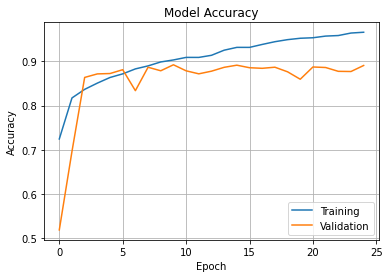

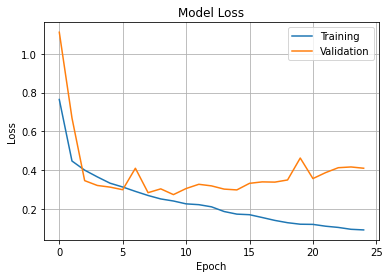

In [ ]:
#Visualize the models accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.grid()
plt.show()
#Visualize the models loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.grid()
plt.show()

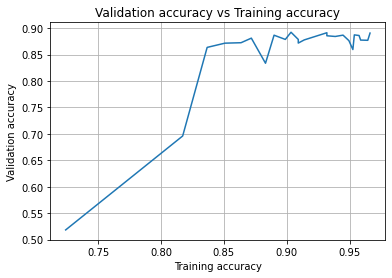

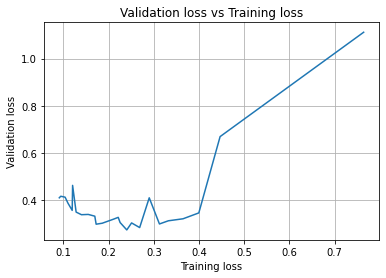

In [ ]:
#Plotting the validation accuracy vs the training accuracy
plt.plot(history.history['accuracy'], history.history['val_accuracy'])
plt.title('Validation accuracy vs Training accuracy')
plt.ylabel('Validation accuracy')
plt.xlabel('Training accuracy')
plt.grid()
plt.show()
#Plotting the validation loss vs the training loss
plt.plot(history.history['loss'], history.history['val_loss'])
plt.title('Validation loss vs Training loss')
plt.ylabel('Validation loss')
plt.xlabel('Training loss')
plt.grid()
plt.show()

#### Resnet

In [ ]:
def residual_block(input_layer,filt_num):
    # Input layer which will be merged with the last layer
    merge_input = input_layer
    # check if the number of filters in the input layer are equal to the number of filters in last layer
    if input_layer.shape[-1] != filt_num:
        # Pass the input through a 1x1 convolutional layer with number of filters equal to the last layer
        merge_input = Conv2D(filt_num, (1,1), padding='same')(input_layer)
        merge_input = BatchNormalization()(merge_input)
    # Layer 1
    x = Conv2D(filt_num, (3,3), padding='same')(input_layer)
    x = BatchNormalization()(x)    
    x = Activation('relu')(x)
    # Layer 2
    x = Conv2D(filt_num, (3,3), padding='same')(x)
    x = BatchNormalization()(x)    
    x = Activation('relu')(x)
    # Layer 3
    x = Conv2D(filt_num, (3,3), padding='same')(x)
    x = BatchNormalization()(x)
    # Add the input layer to the last layer
    output_layer = add([x, merge_input])
    # Apply the activation function after adding both layers
    output_layer = Activation('relu')(output_layer)
    return output_layer

In [ ]:
def residual_model():

    input_shape = Input(shape = (28,28,1))
    # Stage 1: Convolutional layers, batch normalization, and max pooling
    x = Conv2D(32, (3, 3), padding='same')(input_shape)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D((2, 2), padding='same')(x)

    x = Conv2D(32, (3, 3), padding='same')(input_shape)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D((2, 2), padding='same')(x)

    x = Conv2D(32, (3, 3), padding='same')(input_shape)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D((2, 2), padding='same')(x)

    # Stage 2: residual blocks and average pooling
    x = residual_block(x, 32)
    x = residual_block(x, 64)

    x = AveragePooling2D((3,3), padding='same')(x)    
    
    x = Flatten()(x)
    
    # Stage 3: Fully connected and outputl layer
    x = Dense(1024, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(5)(x)
    output = Activation('softmax')(x)
    
    model = Model([input_shape],output)
    
    model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
    
    return model

In [ ]:
model = residual_model()
history = model.fit(x_train, y_train, epochs= 20, batch_size=128, validation_data=(x_val, y_val))

Epoch 1/20
282/282 [==============================] - 19s 66ms/step - loss: 0.7553 - accuracy: 0.7398 - val_loss: 0.8595 - val_accuracy: 0.6202
Epoch 2/20
282/282 [==============================] - 18s 64ms/step - loss: 0.4400 - accuracy: 0.8230 - val_loss: 0.4607 - val_accuracy: 0.7965
Epoch 3/20
282/282 [==============================] - 18s 64ms/step - loss: 0.3878 - accuracy: 0.8418 - val_loss: 0.3676 - val_accuracy: 0.8490
Epoch 4/20
282/282 [==============================] - 18s 64ms/step - loss: 0.3606 - accuracy: 0.8548 - val_loss: 0.4734 - val_accuracy: 0.8034
Epoch 5/20
282/282 [==============================] - 18s 64ms/step - loss: 0.3338 - accuracy: 0.8643 - val_loss: 0.3394 - val_accuracy: 0.8567
Epoch 6/20
282/282 [==============================] - 18s 64ms/step - loss: 0.3165 - accuracy: 0.8712 - val_loss: 0.3464 - val_accuracy: 0.8562
Epoch 7/20
282/282 [==============================] - 18s 63ms/step - loss: 0.2921 - accuracy: 0.8829 - val_loss: 0.3175 - val_accuracy:

In [ ]:
history = model.fit(x_train, y_train, epochs= 15, batch_size=256, validation_data=(x_val, y_val))

Epoch 1/15
141/141 [==============================] - 17s 119ms/step - loss: 0.0890 - accuracy: 0.9659 - val_loss: 0.3490 - val_accuracy: 0.8954
Epoch 2/15
141/141 [==============================] - 16s 115ms/step - loss: 0.0626 - accuracy: 0.9767 - val_loss: 0.4502 - val_accuracy: 0.8742
Epoch 3/15
141/141 [==============================] - 16s 115ms/step - loss: 0.0597 - accuracy: 0.9774 - val_loss: 0.4073 - val_accuracy: 0.8814
Epoch 4/15
141/141 [==============================] - 16s 115ms/step - loss: 0.0510 - accuracy: 0.9808 - val_loss: 0.3958 - val_accuracy: 0.8936
Epoch 5/15
141/141 [==============================] - 16s 115ms/step - loss: 0.0475 - accuracy: 0.9827 - val_loss: 0.4204 - val_accuracy: 0.8898
Epoch 6/15
141/141 [==============================] - 16s 115ms/step - loss: 0.0511 - accuracy: 0.9816 - val_loss: 0.4535 - val_accuracy: 0.8758
Epoch 7/15
141/141 [==============================] - 16s 115ms/step - loss: 0.0454 - accuracy: 0.9833 - val_loss: 0.4731 - val_ac

In [ ]:
history = model.fit(x_train, y_train, epochs= 10, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/10
71/71 [==============================] - 2s 28ms/step - loss: 0.0554 - accuracy: 0.9796 - val_loss: 0.4664 - val_accuracy: 0.8834
Epoch 2/10
71/71 [==============================] - 2s 28ms/step - loss: 0.0474 - accuracy: 0.9830 - val_loss: 0.3599 - val_accuracy: 0.9044
Epoch 3/10
71/71 [==============================] - 2s 28ms/step - loss: 0.0397 - accuracy: 0.9857 - val_loss: 0.4552 - val_accuracy: 0.8924
Epoch 4/10
71/71 [==============================] - 2s 28ms/step - loss: 0.0335 - accuracy: 0.9889 - val_loss: 0.4542 - val_accuracy: 0.8953
Epoch 5/10
71/71 [==============================] - 2s 28ms/step - loss: 0.0336 - accuracy: 0.9884 - val_loss: 0.3936 - val_accuracy: 0.9025
Epoch 6/10
71/71 [==============================] - 2s 28ms/step - loss: 0.0347 - accuracy: 0.9877 - val_loss: 0.4383 - val_accuracy: 0.8997
Epoch 7/10
71/71 [==============================] - 2s 28ms/step - loss: 0.0336 - accuracy: 0.9880 - val_loss: 0.4319 - val_accuracy: 0.9018
Epoch 8/10
71

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2) #report performance metrics #0.8670

375/375 - 3s - loss: 0.3261 - accuracy: 0.8872


In [ ]:
print('Test Accuracy:', test_acc)

Test Accuracy: 0.893583357334137


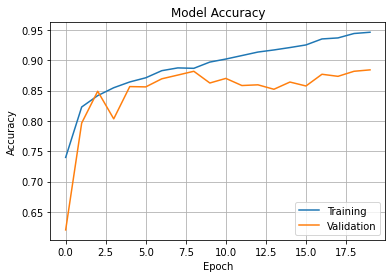

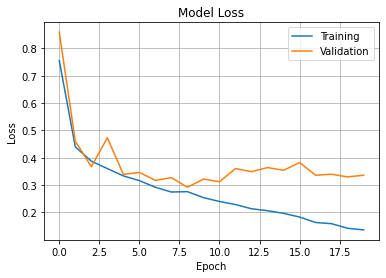

In [ ]:
#Visualize the models accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.grid()
plt.show()
#Visualize the models loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.grid()
plt.show()

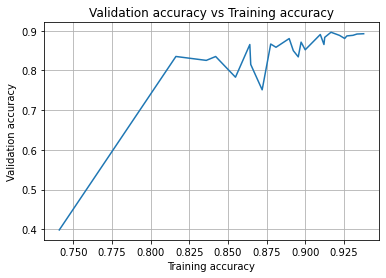

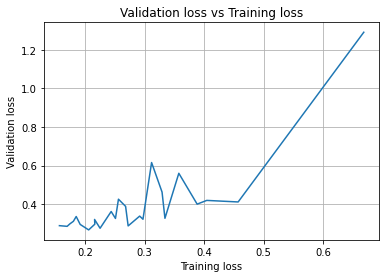

In [ ]:
#Plotting the validation accuracy vs the training accuracy
plt.plot(history.history['accuracy'], history.history['val_accuracy'])
plt.title('Validation accuracy vs Training accuracy')
plt.ylabel('Validation accuracy')
plt.xlabel('Training accuracy')
plt.grid()
plt.show()
#Plotting the validation loss vs the training loss
plt.plot(history.history['loss'], history.history['val_loss'])
plt.title('Validation loss vs Training loss')
plt.ylabel('Validation loss')
plt.xlabel('Training loss')
plt.grid()
plt.show()

#### Testing new models

In [ ]:
def inception_residual_block(input_layer,f1,f21,f22,f31,f32,f4,f5):
#merge_input = input_layer
    merge_input = input_layer
# check if the number of filters needs to be increase, assumes channels last format
    if input_layer.shape[-1] != f5:
        
        merge_input = Conv2D(f5, (1,1), padding='same')(input_layer)
        #merge_input = BatchNormalization()(merge_input)
    
    branch_1 = Conv2D(f1, (1,1), padding='same', activation='relu')(input_layer)
    
    branch_2 = Conv2D(f21, (1,1), padding='same', activation='relu')(input_layer)
    branch_2 = Conv2D(f22, (3,3), padding='same', activation='relu')(branch_2)

    branch_3 = Conv2D(f31, (1,1), padding='same', activation='relu')(input_layer)
    branch_3 = Conv2D(f32, (5,5), padding='same', activation='relu')(branch_3)
    
    branch_4 = MaxPooling2D((3,3), padding='same', strides=(1,1))(input_layer)
    branch_4 = Conv2D(f4, (1,1), padding='same', activation='relu')(branch_4)  
    
    concat_layer = concatenate([branch_1, branch_2, branch_3, branch_4], axis=3)
    
    concat_layer = Conv2D(f5, (1,1), padding='same', activation='relu')(concat_layer)

    output_layer = add([concat_layer, merge_input])
    # activation function
    output_layer = Activation('relu')(output_layer)

    return output_layer

In [ ]:
def inception_residual_model():
# Input 
    input_shape = Input(shape = (28,28,1))
    x = Conv2D(32, (3, 3), padding='same')(input_shape)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D((2, 2), padding='same')(x)

    x = Conv2D(32, (3, 3), padding='same')(input_shape)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D((2, 2), padding='same')(x)

    x = inception_residual_block(x, 32, 16, 32, 16, 32, 16, 16)
    x = inception_residual_block(x, 64, 32, 64, 32, 64, 32, 32)
    #x = inception_residual_block(x, 64, 32, 64, 32, 64, 32, 32)

    x = AveragePooling2D((3, 3), padding='same')(x)
    x = Flatten()(x)

    x = Dense(1024, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(5)(x)
    
    output = Activation('softmax')(x)
    
    model = Model([input_shape],output)
    
    model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])


    return model



In [ ]:
model = inception_residual_model()
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 28, 28, 32)   320         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 28, 28, 32)   128         conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 28, 28, 32)   0           batch_normalization_1[0][0]      
______________________________________________________________________________________________

In [ ]:
model = inception_residual_model()
history = model.fit(x_train, y_train, epochs= 25, batch_size=128, validation_data=(x_val, y_val))

Epoch 1/25
282/282 [==============================] - 8s 28ms/step - loss: 0.8550 - accuracy: 0.7007 - val_loss: 0.7176 - val_accuracy: 0.6851
Epoch 2/25
282/282 [==============================] - 8s 27ms/step - loss: 0.4858 - accuracy: 0.8021 - val_loss: 0.4500 - val_accuracy: 0.8131
Epoch 3/25
282/282 [==============================] - 8s 27ms/step - loss: 0.4317 - accuracy: 0.8233 - val_loss: 0.4009 - val_accuracy: 0.8337
Epoch 4/25
282/282 [==============================] - 8s 27ms/step - loss: 0.3921 - accuracy: 0.8387 - val_loss: 0.4047 - val_accuracy: 0.8307
Epoch 5/25
282/282 [==============================] - 8s 27ms/step - loss: 0.3566 - accuracy: 0.8553 - val_loss: 0.3694 - val_accuracy: 0.8485
Epoch 6/25
282/282 [==============================] - 7s 27ms/step - loss: 0.3292 - accuracy: 0.8656 - val_loss: 0.3374 - val_accuracy: 0.8629
Epoch 7/25
282/282 [==============================] - 8s 27ms/step - loss: 0.2994 - accuracy: 0.8788 - val_loss: 0.3543 - val_accuracy: 0.8537

In [ ]:
history = model.fit(x_train, y_train, epochs= 25, batch_size=128, validation_data=(x_val, y_val))

Epoch 1/25
282/282 [==============================] - 3s 11ms/step - loss: 0.2989 - accuracy: 0.8781 - val_loss: 0.2964 - val_accuracy: 0.8803
Epoch 2/25
282/282 [==============================] - 3s 10ms/step - loss: 0.2879 - accuracy: 0.8835 - val_loss: 0.2833 - val_accuracy: 0.8855
Epoch 3/25
282/282 [==============================] - 3s 11ms/step - loss: 0.2895 - accuracy: 0.8845 - val_loss: 0.2960 - val_accuracy: 0.8827
Epoch 4/25
282/282 [==============================] - 3s 11ms/step - loss: 0.2882 - accuracy: 0.8827 - val_loss: 0.2944 - val_accuracy: 0.8828
Epoch 5/25
282/282 [==============================] - 3s 11ms/step - loss: 0.2799 - accuracy: 0.8860 - val_loss: 0.2854 - val_accuracy: 0.8832
Epoch 6/25
282/282 [==============================] - 3s 11ms/step - loss: 0.2708 - accuracy: 0.8895 - val_loss: 0.2932 - val_accuracy: 0.8788
Epoch 7/25
282/282 [==============================] - 3s 11ms/step - loss: 0.2642 - accuracy: 0.8926 - val_loss: 0.3033 - val_accuracy: 0.8787

In [ ]:
history = model.fit(x_train, y_train, epochs= 10, batch_size=128, validation_data=(x_val, y_val))

Epoch 1/10
282/282 [==============================] - 5s 16ms/step - loss: 0.1558 - accuracy: 0.9372 - val_loss: 0.3340 - val_accuracy: 0.8850
Epoch 2/10
282/282 [==============================] - 5s 16ms/step - loss: 0.1585 - accuracy: 0.9371 - val_loss: 0.3482 - val_accuracy: 0.8791
Epoch 3/10
282/282 [==============================] - 5s 16ms/step - loss: 0.1439 - accuracy: 0.9432 - val_loss: 0.3105 - val_accuracy: 0.8884
Epoch 4/10
282/282 [==============================] - 5s 16ms/step - loss: 0.1449 - accuracy: 0.9426 - val_loss: 0.3977 - val_accuracy: 0.8627
Epoch 5/10
282/282 [==============================] - 5s 16ms/step - loss: 0.1446 - accuracy: 0.9420 - val_loss: 0.3349 - val_accuracy: 0.8912
Epoch 6/10
282/282 [==============================] - 5s 16ms/step - loss: 0.1233 - accuracy: 0.9510 - val_loss: 0.3352 - val_accuracy: 0.8870
Epoch 7/10
282/282 [==============================] - 5s 16ms/step - loss: 0.1211 - accuracy: 0.9521 - val_loss: 0.3512 - val_accuracy: 0.8848

In [ ]:
history = model.fit(x_train, y_train, epochs= 15, batch_size=256, validation_data=(x_val, y_val))

Epoch 1/15
141/141 [==============================] - 3s 24ms/step - loss: 0.1284 - accuracy: 0.9487 - val_loss: 0.3866 - val_accuracy: 0.8809
Epoch 2/15
141/141 [==============================] - 3s 24ms/step - loss: 0.1213 - accuracy: 0.9519 - val_loss: 0.3483 - val_accuracy: 0.8936
Epoch 3/15
141/141 [==============================] - 3s 24ms/step - loss: 0.1165 - accuracy: 0.9546 - val_loss: 0.3596 - val_accuracy: 0.8920
Epoch 4/15
141/141 [==============================] - 3s 24ms/step - loss: 0.1109 - accuracy: 0.9559 - val_loss: 0.3710 - val_accuracy: 0.8932
Epoch 5/15
141/141 [==============================] - 3s 24ms/step - loss: 0.1107 - accuracy: 0.9551 - val_loss: 0.3796 - val_accuracy: 0.8914
Epoch 6/15
141/141 [==============================] - 3s 24ms/step - loss: 0.1119 - accuracy: 0.9545 - val_loss: 0.3779 - val_accuracy: 0.8889
Epoch 7/15
141/141 [==============================] - 3s 24ms/step - loss: 0.1147 - accuracy: 0.9536 - val_loss: 0.3871 - val_accuracy: 0.8898

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2) #report performance metrics #0.8670

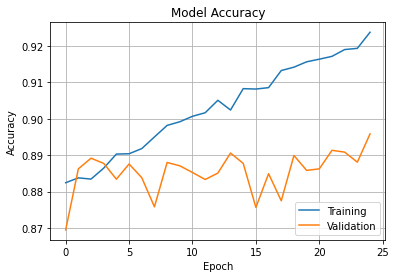

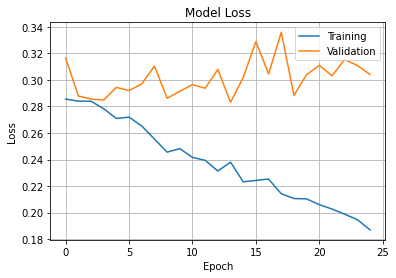

In [ ]:
#Visualize the models accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.grid()
plt.show()
#Visualize the models loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.grid()
plt.show()

In [ ]:
def inception_model():
    # Input 
    input_shape = Input(shape = (28,28,1))
    
    # Stage 1: convolutional layers and max pooling layers
    x = Conv2D(32, (3,3), padding='same', strides=(2, 2), activation='relu')(input_shape)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2,2), padding='same', strides=(2, 2))(x)
    x = Conv2D(32, (1,1), padding='same', strides=(1, 1), activation='relu')(input_shape)
    x = BatchNormalization()(x)
    x = Conv2D(96, (3,3), padding='same', strides=(1, 1), activation='relu')(input_shape)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2,2), padding='same', strides=(2, 2))(x)
    
    # Stage 2: Two inception blocks and average pooling
    x = inception_block(x, 64, 96, 128, 16, 32, 32)
    x = inception_block(x, 128, 128, 192, 32, 96, 64)
    x = AveragePooling2D((3, 3), padding='same', strides=2)(x)
    x = Flatten()(x)
    
    # Stage 3: Fully connected layer with 0.5 deopout and output layer
    x = Dense(1024, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(5)(x)
    output = Activation('softmax')(x)
    model = Model([input_shape],output)
    
    model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
    
    return model

In [ ]:
def residual_model():
    input_shape = Input(shape = (28,28,1))
    
    x = Conv2D(32, (3, 3), padding='same')(input_shape)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D((2, 2), padding='same')(x)

    x = Conv2D(64, (3, 3), padding='same')(input_shape)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D((2, 2), padding='same')(x)

    x = Conv2D(128, (3, 3), padding='same')(input_shape)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D((2, 2), padding='same')(x)

    x = residual_block(x, 32)
    x = residual_block(x, 64)
    

    x = AveragePooling2D((3,3), padding='same')(x)    
    
    
    x = Flatten()(x)
    
    x = Dense(1024, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(5)(x)
    
    output = Activation('softmax')(x)
    
    model = Model([input_shape],output)
    
    model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
    
    return model

#### Final step: using all of the training data

In [ ]:
x = x.astype('float32') / 255.0

x = x.reshape((60000, 28, 28, 1))

y = to_categorical(y)

In [ ]:
x = x.reshape((60000, 28, 28, 1))


x = x.astype('float32')


x = (x-mean)/(std+1e-9)



In [ ]:
y = to_categorical(y)

In [ ]:
y_train.shape

(36000, 5)

In [ ]:
y.shape

(60000, 5)

In [ ]:
model = residual_model()

model.fit(x, y, epochs= 20 , batch_size=128)

Epoch 1/20
469/469 [==============================] - 4s 9ms/step - loss: 0.5821 - accuracy: 0.7724
Epoch 2/20
469/469 [==============================] - 4s 9ms/step - loss: 0.4096 - accuracy: 0.8338
Epoch 3/20
469/469 [==============================] - 4s 9ms/step - loss: 0.3731 - accuracy: 0.8494
Epoch 4/20
469/469 [==============================] - 4s 9ms/step - loss: 0.3442 - accuracy: 0.8602
Epoch 5/20
469/469 [==============================] - 4s 9ms/step - loss: 0.3266 - accuracy: 0.8673
Epoch 6/20
469/469 [==============================] - 4s 9ms/step - loss: 0.3069 - accuracy: 0.8748
Epoch 7/20
469/469 [==============================] - 4s 9ms/step - loss: 0.2957 - accuracy: 0.8788
Epoch 8/20
469/469 [==============================] - 4s 9ms/step - loss: 0.2813 - accuracy: 0.8858
Epoch 9/20
469/469 [==============================] - 4s 9ms/step - loss: 0.2736 - accuracy: 0.8886
Epoch 10/20
469/469 [==============================] - 4s 9ms/step - loss: 0.2621 - accuracy: 0.8928

In [ ]:
model.fit(x, y, epochs= 15 , batch_size=256)

Epoch 1/15
235/235 [==============================] - 3s 15ms/step - loss: 0.1376 - accuracy: 0.9459
Epoch 2/15
235/235 [==============================] - 3s 15ms/step - loss: 0.1248 - accuracy: 0.9502
Epoch 3/15
235/235 [==============================] - 3s 15ms/step - loss: 0.1166 - accuracy: 0.9538
Epoch 4/15
235/235 [==============================] - 3s 15ms/step - loss: 0.1150 - accuracy: 0.9547
Epoch 5/15
235/235 [==============================] - 3s 15ms/step - loss: 0.1095 - accuracy: 0.9570
Epoch 6/15
235/235 [==============================] - 3s 15ms/step - loss: 0.1092 - accuracy: 0.9561
Epoch 7/15
235/235 [==============================] - 3s 15ms/step - loss: 0.1031 - accuracy: 0.9596
Epoch 8/15
235/235 [==============================] - 3s 15ms/step - loss: 0.0998 - accuracy: 0.9606
Epoch 9/15
235/235 [==============================] - 3s 15ms/step - loss: 0.1017 - accuracy: 0.9599
Epoch 10/15
235/235 [==============================] - 3s 15ms/step - loss: 0.0944 - accura

In [ ]:
model.fit(x, y, epochs= 10 , batch_size=512)

Epoch 1/10
118/118 [==============================] - 3s 25ms/step - loss: 0.0515 - accuracy: 0.9809
Epoch 2/10
118/118 [==============================] - 3s 25ms/step - loss: 0.0415 - accuracy: 0.9852
Epoch 3/10
118/118 [==============================] - 3s 25ms/step - loss: 0.0373 - accuracy: 0.9867
Epoch 4/10
118/118 [==============================] - 3s 24ms/step - loss: 0.0371 - accuracy: 0.9861
Epoch 5/10
118/118 [==============================] - 3s 25ms/step - loss: 0.0368 - accuracy: 0.9865
Epoch 6/10
118/118 [==============================] - 3s 25ms/step - loss: 0.0383 - accuracy: 0.9856
Epoch 7/10
118/118 [==============================] - 3s 25ms/step - loss: 0.0409 - accuracy: 0.9847
Epoch 8/10
118/118 [==============================] - 3s 25ms/step - loss: 0.0364 - accuracy: 0.9868
Epoch 9/10
118/118 [==============================] - 3s 25ms/step - loss: 0.0335 - accuracy: 0.9876
Epoch 10/10
118/118 [==============================] - 3s 24ms/step - loss: 0.0331 - accura

In [ ]:
### Writing to the test csv file
kaggle_test = pd.read_csv('testX.csv')
test_data = kaggle_test[kaggle_test.columns[1:785]].values

#test_data = test_data.astype('float32') / 255.0
test_data = test_data.reshape((10000, 28, 28, 1))
test_data = test_data.astype('float32')
test_data = (test_data-mean)/(std+1e-9)

#kaggle_predictions = model.predict_classes(test_data)
kaggle_predictions = np.argmax(model.predict(test_data),axis=1)
kaggle_test['Label'] = kaggle_predictions
final_result = kaggle_test.drop(kaggle_test.columns[1:785],axis=1)
final_result.to_csv('Results_residual_8_4.csv', index=False)